In [0]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [0]:
def tanh(x):
  return (1.0 - numpy.exp(-2 * x))/( 1.0  + numpy.exp(-2 * x))

def tanh_derivative(x):
  return (1+ tanh(x)) * ( 1 - tanh(x))


epochs: 0.0
[0 0] 0.31634987228520156
[0 1] 0.38455314510086014
[1 0] 0.49960366414001517
[1 1] 0.5470092417007291
epochs: 1.0
[0 0] 0.10110562119575021
[0 1] 0.4983062530300437
[1 0] 0.5483740117095983
[1 1] 0.6358128781126651
epochs: 2.0
[0 0] 0.07164948329787552
[0 1] 0.8610758132814952
[1 0] 0.8502850626450229
[1 1] 0.07158530421971639
epochs: 3.0
[0 0] 0.01758656789925367
[0 1] 0.966663773401989
[1 0] 0.9651222166853127
[1 1] 0.011468668342141863
epochs: 4.0
[0 0] -0.0017118993569207345
[0 1] 0.9815292663780985
[1 0] 0.9828812324283913
[1 1] -0.0003037091869647862
epochs: 5.0
[0 0] 0.0026985374081322524
[0 1] 0.9885083594808965
[1 0] 0.9891298042443863
[1 1] 0.015552778145753128
epochs: 6.0
[0 0] 0.005625211435815758
[0 1] 0.9922099656276941
[1 0] 0.9915443580479175
[1 1] 0.01694332658239157
epochs: 7.0
[0 0] 0.0019544398675402134
[0 1] 0.9934850143000605
[1 0] 0.9934672674082785
[1 1] 0.0007886110283729943
epochs: 8.0
[0 0] 0.0036493566842660274
[0 1] 0.9950489745378326
[1 0] 0.9

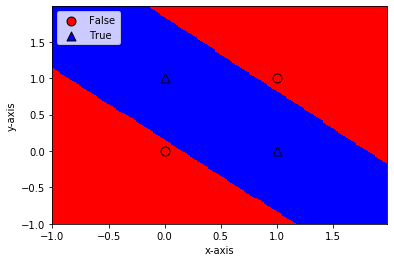

In [9]:
import numpy
class NeuralNetwork:
    # net_arch consists of a list of integers, indicating
    # the number of neurons in each layer
    def __init__(self, net_arch):
        self.activation_func = tanh
        self.activation_derivative = tanh_derivative
        self.layers = len(net_arch)
        self.steps_per_epoch = 1000
        self.net_arch = net_arch

        # initialize the weights with random values in the range (-1,1)
        self.weights = []
        for layer in range(len(net_arch) - 1):
            w = 2 * numpy.random.rand(net_arch[layer] + 1, net_arch[layer + 1]) - 1
            self.weights.append(w)

    def fit(self, data, labels, learning_rate=0.1, epochs=10):
        """
        :param data: data is the set of all possible pairs of booleans
                     True or False indicated by the integers 1 or 0
                     labels is the result of the logical operation 'xor'
                     on each of those input pairs
        :param labels: array of 0/1 for each datum
        """

        # Add bias units to the input layer
        ones = numpy.ones((1, data.shape[0]))
        Z = numpy.concatenate((ones.T, data), axis=1)
        training = epochs * self.steps_per_epoch
        for k in range(training):
            if k % self.steps_per_epoch == 0:
                # print ('epochs:', k/self.steps_per_epoch)
                print('epochs: {}'.format(k / self.steps_per_epoch))
                for s in data:
                    print(s, nn.predict(s))

            sample = numpy.random.randint(data.shape[0])
            y = [Z[sample]]

            for i in range(len(self.weights) - 1):
                activation = numpy.dot(y[i], self.weights[i])
                activation_f = self.activation_func(activation)
                # add the bias for the next layer
                activation_f = numpy.concatenate((numpy.ones(1), numpy.array(activation_f)))
                y.append(activation_f)

            # last layer
            activation = numpy.dot(y[-1], self.weights[-1])
            activation_f = self.activation_func(activation)
            y.append(activation_f)

            # error for the output layer
            error = labels[sample] - y[-1]
            delta_vec = [error * self.activation_derivative(y[-1])]

            # we need to begin from the back from the next to last layer
            for i in range(self.layers - 2, 0, -1):
                error = delta_vec[-1].dot(self.weights[i][1:].T)
                error = error * self.activation_derivative(y[i][1:])
                delta_vec.append(error)

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            delta_vec.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight
            for i in range(len(self.weights)):
                layer = y[i].reshape(1, nn.net_arch[i] + 1)

                delta = delta_vec[i].reshape(1, nn.net_arch[i + 1])
                self.weights[i] += learning_rate * layer.T.dot(delta)

    def predict(self, x):
        val = numpy.concatenate((numpy.ones(1).T, numpy.array(x)))
        for i in range(0, len(self.weights)):
            val = self.activation_func(numpy.dot(val, self.weights[i]))
            val = numpy.concatenate((numpy.ones(1).T, numpy.array(val)))

        return val[1]

    def plot_decision_regions(self, X, y, points=200):
        markers = ('o', '^')
        colors = ('red', 'blue')
        cmap = ListedColormap(colors)

        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        # To produce zoomed-out figures, you can replace the preceding 2 lines with:
        # x1_min, x1_max = -10, 11
        # x2_min, x2_max = -10, 11

        resolution = max(x1_max - x1_min, x2_max - x2_min) / float(points)

        xx1, xx2 = numpy.meshgrid(numpy.arange(x1_min,
                                               x1_max,
                                               resolution),
                                  numpy.arange(x2_min, x2_max, resolution))
        input = numpy.array([xx1.ravel(), xx2.ravel()]).T
        Z = numpy.empty(0)
        for i in range(input.shape[0]):
            val = nn.predict(numpy.array(input[i]))
            if val < 0.5:
                val = 0
            if val >= 0.5:
                val = 1
            Z = numpy.append(Z, val)

        Z = Z.reshape(xx1.shape)

        plt.pcolormesh(xx1, xx2, Z, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        # plot all samples

        classes = ["False", "True"]

        for idx, cl in enumerate(numpy.unique(y)):
            plt.scatter(x=X[y == cl, 0],
                        y=X[y == cl, 1],
                        alpha=1.0,
                        c=colors[idx],
                        edgecolors='black',
                        marker=markers[idx],
                        s=80,
                        label=classes[idx])

        plt.xlabel('x-axis')
        plt.ylabel('y-axis')
        plt.legend(loc='upper left')
        plt.show()


if __name__ == '__main__':
    numpy.random.seed(0)

    # Initialize the NeuralNetwork with 2 input, 2 hidden, and 1 output neurons
    nn = NeuralNetwork([2, 2, 1])

    X = numpy.array([[0, 0],
                     [0, 1],
                     [1, 0],
                     [1, 1]])

    y = numpy.array([0, 1, 1, 0])

    nn.fit(X, y, epochs=10)

    print("Final prediction")
    for s in X:
        print(s, nn.predict(s))

    nn.plot_decision_regions(X, y)